In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130,322,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3,115,564,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2,124,261,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4,128,263,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120,269,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172,199,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2,120,263,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2,140,294,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140,192,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	1
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	1
float64		column 7	1
float64		column 8	2
float64		column 9	5
float64		column 10	3
float64		column 11	5
float64		column 12	2
float64		column 13	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,269.000000,269.000000,270.000000,270.000000,270.000000,269.000000,269.000000,268.000000,265.000000,267.000000,265.000000,268.000000,267.000000
mean,0.680297,54.386617,3.174074,131.344444,249.659259,0.144981,1.026022,149.720149,0.335849,1.045318,1.588679,0.675373,4.685393
std,0.467231,9.093583,0.950090,17.861608,51.686237,0.352738,0.997792,23.101633,0.473180,1.149569,0.615968,0.945633,1.938503
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

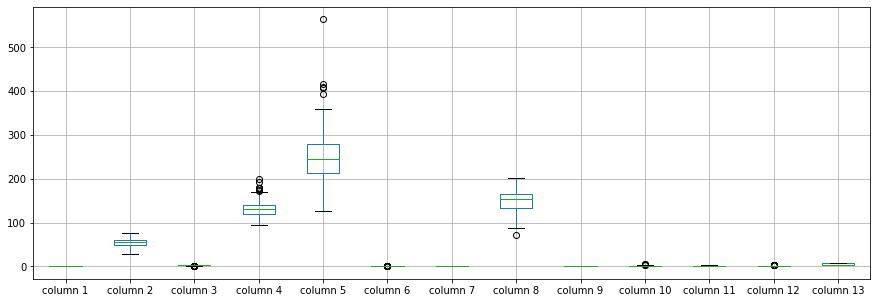

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.680297
column 2      54.386617
column 3       3.174074
column 4     131.344444
column 5     249.659259
column 6       0.144981
column 7       1.026022
column 8     149.720149
column 9       0.335849
column 10      1.045318
column 11      1.588679
column 12      0.675373
column 13      4.685393
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.081771,0.033780,-0.060339,-0.188609,0.050273,0.047552,-0.074057,0.175347,0.097763,0.042550,0.093066,0.382326
column 2,-0.081771,1.000000,0.098218,0.268725,0.218223,0.114404,0.131478,-0.428869,0.113642,0.205698,0.156010,0.353227,0.120089
column 3,0.033780,0.098218,1.000000,-0.043196,0.090465,-0.097959,0.077910,-0.309233,0.351782,0.163607,0.144114,0.226303,0.264959
column 4,-0.060339,0.268725,-0.043196,1.000000,0.173019,0.134657,0.112484,-0.047887,0.085921,0.230476,0.138304,0.082956,0.124940
column 5,-0.188609,0.218223,0.090465,0.173019,1.000000,0.021217,0.164838,-0.030711,0.088477,0.040095,-0.008709,0.125475,0.028084
column 6,0.050273,0.114404,-0.097959,0.134657,0.021217,1.000000,0.043844,0.010986,-0.007716,-0.026580,0.028549,0.129784,0.039844
column 7,0.047552,0.131478,0.077910,0.112484,0.164838,0.043844,1.000000,-0.074838,0.090956,0.117721,0.147175,0.109556,-0.008093
column 8,-0.074057,-0.428869,-0.309233,-0.047887,-0.030711,0.010986,-0.074838,1.000000,-0.374510,-0.347044,-0.386768,-0.272154,-0.250879
column 9,0.175347,0.113642,0.351782,0.085921,0.088477,-0.007716,0.090956,-0.374510,1.000000,0.271663,0.250524,0.151846,0.304954
column 10,0.097763,0.205698,0.163607,0.230476,0.040095,-0.026580,0.117721,-0.347044,0.271663,1.000000,0.605596,0.257415,0.322728


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+6,13+6+6,13+6+6+6,13+6+6+6+6,13+6+6+6+6+6,13+6+6+6+6,13+6+6+6,13+6+6,13+6,13], vae_layer = False, seed = 6)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 608.1985244750977
Epoch: 1 , loss: 608.7741432189941
Epoch: 2 , loss: 607.1066474914551
Epoch: 3 , loss: 607.531078338623
Epoch: 4 , loss: 606.8270301818848
Epoch: 5 , loss: 607.20166015625
Epoch: 6 , loss: 609.748420715332
Epoch: 7 , loss: 607.7638740539551
Epoch: 8 , loss: 606.3691368103027
Epoch: 9 , loss: 608.3188095092773
Epoch: 10 , loss: 608.3751983642578
Epoch: 11 , loss: 607.6147956848145
Epoch: 12 , loss: 606.6918830871582
Epoch: 13 , loss: 606.4818534851074
Epoch: 14 , loss: 606.8611335754395
Epoch: 15 , loss: 606.5620422363281
Epoch: 16 , loss: 607.4987678527832
Epoch: 17 , loss: 607.349609375
Epoch: 18 , loss: 607.866943359375
Epoch: 19 , loss: 607.3632583618164
Epoch: 20 , loss: 608.0487861633301
Epoch: 21 , loss: 607.7982292175293
Epoch: 22 , loss: 607.3023262023926
Epoch: 23 , loss: 609.1720733642578
Epoch: 24 , loss: 608.5378456115723
Epoch: 25 , loss: 607.4730377197266
Epoch: 26 , los

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(217.56160992665517, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.040179419881827765

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130,322,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3,115,564,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2,124,261,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4,128,263,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120,269,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172,199,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2,120,263,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2,140,294,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140,192,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [20]:
imputations[-1].to_excel("Sheart_AW_1(imp).xlsx", index=False, header=False)